In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
import cmocean
from matplotlib import colors
import glidertools as gt
from scipy.interpolate import LinearNDInterpolator

In [2]:
# Open 
filenames = 'C:/Users/marqjace/TH_line/deployments/oct_2024/transect1/p266*.nc'

gt.load.seaglider_show_variables(filenames)

# names = [
#     'ctd_depth',
#     'ctd_time',
#     'ctd_pressure',
#     'salinity',
#     'temperature',
#     'aanderaa4831_dissolved_oxygen',
#     'eng_volt1',
#     'eng_volt2'
# ]

# ds_dict = gt.load.seaglider_basestation_netCDFs(
#     filenames, names,
#     return_merged=True,
#     keep_global_attrs=False
# )


# print(ds_dict.keys())

# sg_data_point = ds_dict['sg_data_point']

# dat = sg_data_point.rename({
#     'salinity': 'salt_corrected',
#     'temperature': 'temp_corrected',
#     'ctd_pressure': 'pressure',
#     'ctd_depth': 'depth',
#     'ctd_time': 'time_raw',
#     'aanderaa4831_dissolved_oxygen': 'oxygen',
#     'eng_volt1':'high_volt',
#     'eng_volt2':'low_volt'
# })

# print(dat)

# dat.to_netcdf('C:/Users/marqjace/TH_line/deployments/oct_2023/transect4/1_24_merged_oxy.nc')

information is based on file: C:/Users/marqjace/TH_line/deployments/oct_2024/transect1\p2660010.nc


,dims,units,comment
name,,,
aa4831_O2,aa4831_data_point,micromoles/L,"Dissolved oxygen as reported by the instument, based on on-board calibration data, assuming optode temperature but without depth or salinity correction"
aa4831_airsat,aa4831_data_point,,As reported by the instrument
aa4831_calphase,aa4831_data_point,,As reported by the instrument
aa4831_tcphase,aa4831_data_point,,As reported by the instrument
aa4831_temp,aa4831_data_point,degrees_Celsius,As reported by the instrument
aa4831_time,aa4831_data_point,seconds since 1970-1-1 00:00:00,Aanderaa aa4831 time in GMT epoch format
aanderaa4831_dissolved_oxygen,aa4831_data_point,micromoles/kg,"Dissolved oxygen concentration, calculated from optode tcphase corrected for salininty and depth"
aanderaa4831_dissolved_oxygen_qc,aa4831_data_point,,Whether to trust each optode dissolved oxygen value
aanderaa4831_instrument_dissolved_oxygen,aa4831_data_point,micromoles/kg,Dissolved oxygen concentration reported from optode corrected for salinity


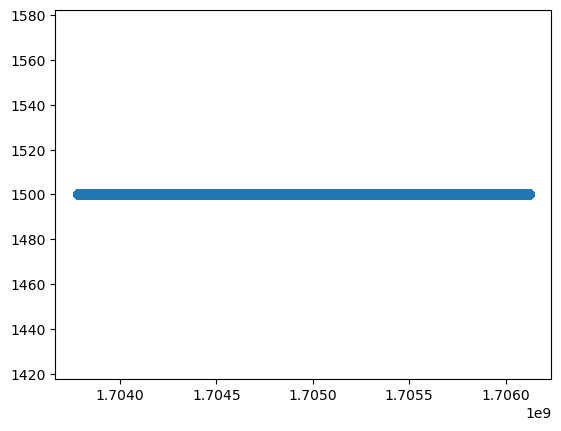

In [3]:
plt.scatter(dat['time_raw'], dat['high_volt'])

In [4]:
new_data = xr.open_dataset(r'C:/Users/marqjace/TH_line/deployments/oct_2023/transect4/1_24_merged_oxy.nc', decode_times=False)
new_data

depth2 = new_data.depth
dives2 = new_data.dives
latitude2 = new_data.latitude
longitude2 = new_data.longitude
pres2 = new_data.pressure
temp2 = new_data.temp_corrected
salt2 = new_data.salt_corrected
oxygen2 = new_data.oxygen

# Set up new grid (96 points longitude is every 5 km, 200 points depth is every 5 meters)


# number of grid points:

xn, yn = 112, 200


# grid window

xmin, xmax = -130.5, -123.5
ymin, ymax = 0, 1000


# Generate a regular grid to interpolate the data

xgrid = np.linspace(xmin, xmax, xn)
ygrid = np.linspace(ymin, ymax, yn)
Xgrid3, Ygrid3 = np.meshgrid(xgrid, ygrid)


# Interpolate using "linear" method

temp = griddata(points = (longitude2, depth2),
              values = temp2,
              xi = (Xgrid3, Ygrid3),
              method = 'linear')

oxygen = griddata(points = (longitude2, depth2),
              values = oxygen2,
              xi = (Xgrid3, Ygrid3),
              method = 'linear')

salinity = griddata(points = (longitude2, depth2),
              values = salt2,
              xi = (Xgrid3, Ygrid3),
              method = 'linear')



KeyboardInterrupt



In [ ]:
# set the time coverage start and end
time_start = new_data.attrs['time_coverage_start']
time_end = new_data.attrs['time_coverage_end']

In [ ]:
# Set up figure

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10,6), dpi=300)
# plt.subplots_adjust(hspace=0.3)
# plt.suptitle(f'TH Line - SG685 - {time_start} - {time_end}', y=0.93)


# Gridded SG685 Temp Contour Plot

contour1 = ax1.contourf(Xgrid3, Ygrid3, temp, cmap=cmocean.cm.thermal, zorder=2)
ax1.invert_yaxis()
# ax1.set_title('Temperature Plot')
ax1.set_xlim(-130, -124)
ax1.set_ylabel('Depth (m)')
ax1.grid(zorder=1, alpha=0.5)
ax1.set_title(f'TH Line - SG685 - {time_start} - {time_end}', fontsize='large', pad=10)
plt.colorbar(contour1, label=r'Temperature ($\degree$C)', pad=0.02)


# Gridded SG685 Salinity Contour Plot

contour2 = ax2.contourf(Xgrid3, Ygrid3, salinity, cmap=cmocean.cm.haline, zorder=2)
ax2.invert_yaxis()
# ax2.set_title('Salinity Plot')
ax2.set_xlim(-130, -124)
# ax2.set_xlabel(r'Longitude ($\degree$E)')
ax2.set_ylabel('Depth (m)')
ax2.grid(zorder=1, alpha=0.5)
plt.colorbar(contour2, label=r'Salinity (PSU)', pad=0.02)

# Gridded SG685 Oxygen Contour Plot

contour3 = ax3.contourf(Xgrid3, Ygrid3, oxygen, cmap=cmocean.cm.oxy, zorder=2)
ax3.invert_yaxis()
# ax3.set_title('Oxygen Plot')
ax3.set_xlim(-130, -124)
ax3.set_xlabel(r'Longitude ($\degree$E)')
ax3.set_ylabel('Depth (m)')
ax3.grid(zorder=1, alpha=0.5)
plt.colorbar(contour3, label=r'Oxygen ($\mu$M/kg)', pad=0.02)

In [ ]:
# Set up figure

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10,6), dpi=300)
# plt.subplots_adjust(hspace=0.3)
# plt.suptitle(f'TH Line - SG685 - {time_start} - {time_end}', y=0.93)


# Gridded SG685 Temp Contour Plot

scatter1 = ax1.scatter(Xgrid3, Ygrid3, c=temp, cmap=cmocean.cm.thermal, zorder=2, s=14)
# contour1 = ax1.contour(Xgrid3, Ygrid3, temp, colors='white', zorder=3, linewidths=1, levels=5)
# ax1.clabel(contour1, contour1.levels, inline=True, fontsize=10, colors='white')
ax1.invert_yaxis()
ax1.set_xlim(-130, -124)
ax1.set_ylabel('Depth (m)')
ax1.grid(zorder=1, alpha=0.5)
ax1.set_title(f'TH Line - SG685 - {time_start} - {time_end}', fontsize='large', pad=10)
plt.colorbar(scatter1, label=r'Temperature ($\degree$C)', pad=0.02)


# Gridded SG685 Salinity Contour Plot

scatter2 = ax2.scatter(Xgrid3, Ygrid3, c=salinity, cmap=cmocean.cm.haline, zorder=2, s=14)
# contour2 = ax2.contour(Xgrid3, Ygrid3, salinity, colors='white', zorder=3, linewidths=1, levels=5)
# ax2.clabel(contour2, contour2.levels, inline=True, fontsize=10, colors='white')
ax2.invert_yaxis()
ax2.set_xlim(-130, -124)
ax2.set_ylabel('Depth (m)')
ax2.grid(zorder=1, alpha=0.5)
plt.colorbar(scatter2, label=r'Salinity (PSU)', pad=0.02)

# Gridded SG685 Oxygen Contour Plot

scatter3 = ax3.scatter(Xgrid3, Ygrid3, c=oxygen, cmap=cmocean.cm.oxy, zorder=2, s=14)
# contour3 = ax3.contour(Xgrid3, Ygrid3, oxygen, colors='white', zorder=3, linewidths=1, levels=5)
# ax3.clabel(contour3, contour3.levels, inline=True, fontsize=10, colors='white')
ax3.invert_yaxis()
ax3.set_xlim(-130, -124)
ax3.set_xlabel(r'Longitude ($\degree$E)')
ax3.set_ylabel('Depth (m)')
ax3.grid(zorder=1, alpha=0.5)
plt.colorbar(scatter3, label=r'Oxygen ($\mu$M/kg)', pad=0.02)